# Interactive Break
## Arrays, Indexing, Images, Thresholding, Masks

<div class="alert alert-block alert-success">

<b>Outline: </b>
<ul>
    <li><code>Numpy</code> arrays can be manipulated/accessed/read with the bracket operator <code>array[]</code> </li>
    <li>The bracket operator <code>array[]</code> accepts integer inputs and the colon operator <code>array[:] array[0:5] array[:-2] array[5:]</code> </li>
    <li>Multidimensional indexing is done by using a <code>,</code>: <code>array[3,:,5]</code></li>
    <li>RGB images contain three channels for each color </li>
    <li>Images can be read and saved e.g. with the module <code>imageio</code> using <code>imread()</code> and <code>imsave()</code></li>
    <li><code>Matplotlib</code> provides handy functions to create scientific figures: <code>figure()</code> <code>imshow()</code> <code>show()</code> </li>
    <li>Thresholding can be used to extract/select parts of an image</li>
    <li>Binary masks can be used to index/modify parts of an image</li>
</ul>
</div> 

---

## Indexing Multidimensional Arrays

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
You can use the bracket operator <code>[ ]</code> to access certain parts of the image:
<ul>
    <li><code>array[5,5,5]</code> accesses the array at the point z=5, y=5, x=5.</li>
    <li><code>array[5,5,:]</code> accesses the array at z=5, y=5, x= xmin to xmax (everything in x)</li>
    <li><code>array[:]</code> accesses the whole array</li>
<li><code>array[10:13, 5, 5]</code> accesses the array at z=10 to 13 (i.e. 10,11,12 – 13 is exclusive!), y=5, x=5</li>
    </ul>

</div>

In [ ]:
# run matplotlib in 'notebook' mode, allows for interactive figures
%matplotlib notebook

# import modules needed
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# initialize a empty 200 x 200 arrays with zeros
initials_array = np.zeros((200,200))

# assign (arbitrary) values to certain subregions. note, the first index affects y, the second does x!
# initial_arrays[from_y:to_y, from_x:to_x]
initials_array[20:160, 60:80] = 1
initials_array[20:40, 60:140] = 2
initials_array[60:80, 80:120] = 3

# plot 2D image
plt.figure()
plt.imshow(initials_array)
plt.colorbar()
plt.show()

<div class="alert alert-block alert-warning">
    <b>Task:</b>
    
* Create a image showing \\the initial letter of your name using the bracket-operator [ ].
* Use 'blocky' letters, do not try to make diagonal entries.
* If you end up with a rather difficuilt letter such as M, N, V, W, or Z, please use another letter.

</div>

In [ ]:
# initialize a empty 200 x 200 arrays with zeros
initials_array = np.zeros((200,200))

# assign values to certain subregions
initials_array[...] = 1  #TODO
initials_array[...] = 2 #TODO


# plot 2D image
plt.figure()
plt.imshow(initials_array)
plt.colorbar()
plt.show()

---

## Reading Images

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
Image of various formats can be read with the function <code>imread(path_to_image)</code> frome the module <code>imageio</code>. Paths have to defined as a string/literal in Python using quotation marks: <code>'word'</code> or <code>"word"</code>.

</div>



<div class="alert alert-block alert-warning">
<b>Task:</b>
    
Read the picture with the path <code>'iekm_picture.jpg'</code> using the function <code>imageio.imread()</code>

</div>

In [ ]:
import imageio

image_array = imageio.imread('iekm_picture.jpg') #TODO: read image

print('image_array has the shape: %d (y) %d (x) %d (color)' % image_array.shape)

plt.figure()
plt.imshow(image_array)
plt.title('IEKM')
plt.show()

---

## Thresholding

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
Images are made out of numbers which we interpret in a certain way. Thresholding is the method of asking <b>'Which pixel in the image are greater/smaller than a (threshold) value?'</b>.
    
The output of the threshold is a <b>binary mask</b>, i.e., a image where each pixel indicate if the "threshold question" is true/false.

You can write comparisons e.g. with <code>result = image  < 5</code> (smaller than 5), <code>result = image  >= 5</code> (bigger or equal to 5) <code>result == image  < 5</code> (is exactly five).
</div>

<div class="alert alert-block alert-warning">
<b>Task:</b>
    
Create a binary mask which indicates values greater than 0.5 in the array <code>initials_array</code>.
</div>

In [ ]:
binary_initial_mask = initials_array > 0.5 #TODO: threshold initials_array > 0.5

plt.figure()
plt.subplot(121)
plt.imshow(initials_array)
plt.title('Funny-colored F')

plt.subplot(122)
plt.imshow(binary_initial_mask.astype(np.uint8)) # cast datatype to unsigned 8 bit: 0 ... 255
plt.title('Binary Mask of Funny-colored F')

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
The created mask can now be used to manipulate other images. The mask can be used in combination with the bracket operator. If the mask and image size are the same, assignments like the following are possible: <code>image[mask > 1] = 0</code>, which sets everything to 0 where the mask is greater than 1. A short form of writing <code>mask > 0</code> is to omit the comparison statement:  <code>image[mask] = 0</code>.
    
RGB images have 3 dimensions [y,x,c], with c being the color (c=0,1,2 being red, green, blue, respectively). To modify them with a two-dimensional mask [y,x], one can use the mask to index the first two dimensions and an additional index to access the color channel. For example, to set the red channel in the image with the two-dimensional mask, one can use:

<code>image[mask, 0] = 1 </code>
    
The right side of the statement can also be an array with the same size as the indexed elements, for example:
    
<code>image[mask, 0] = 1.1 * image[mask, 0]</code>
</div>

<div class="alert alert-block alert-warning">
<b>Task:</b>
    
Try to manipulate colors in the <code> numpy_iekm_image </code> with the binary mask you created, so that the letter is clearly visible, see examples below. Use arithmic operations <code>(+ - / *)</code> to manipulate the color values directly.

<b>Examples:</b>
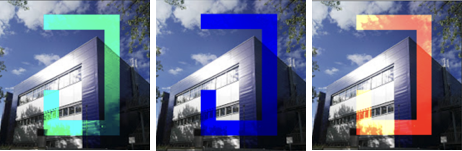</div>

In [ ]:
# reload the image
numpy_iekm_image = imageio.imread('iekm_picture.jpg')


numpy_iekm_image[binary_initial_mask, 0] = 1.1 * numpy_iekm_image[binary_initial_mask, 0] #TODO: use the binary_initial_mask to manipulate red, green, and blue of the image
numpy_iekm_image[binary_initial_mask, 1] = 2 * numpy_iekm_image[binary_initial_mask, 0] #TODO: use the binary_initial_mask to manipulate red, green, and blue of the image
numpy_iekm_image[binary_initial_mask, 2] = 5

# clip/limit values between 0 and 255
numpy_iekm_image = np.clip(numpy_iekm_image, a_min=0, a_max=255)

plt.figure()
plt.imshow(numpy_iekm_image)
plt.title('Letter + IEKM')
plt.show()

<div class="alert alert-block alert-warning">
<b>Bonus Tasks:</b>

* Threshold components (red, green, blue) of the image itself and guess the result of the operation before you run it.

* Swap two color channels with each other.
</div>